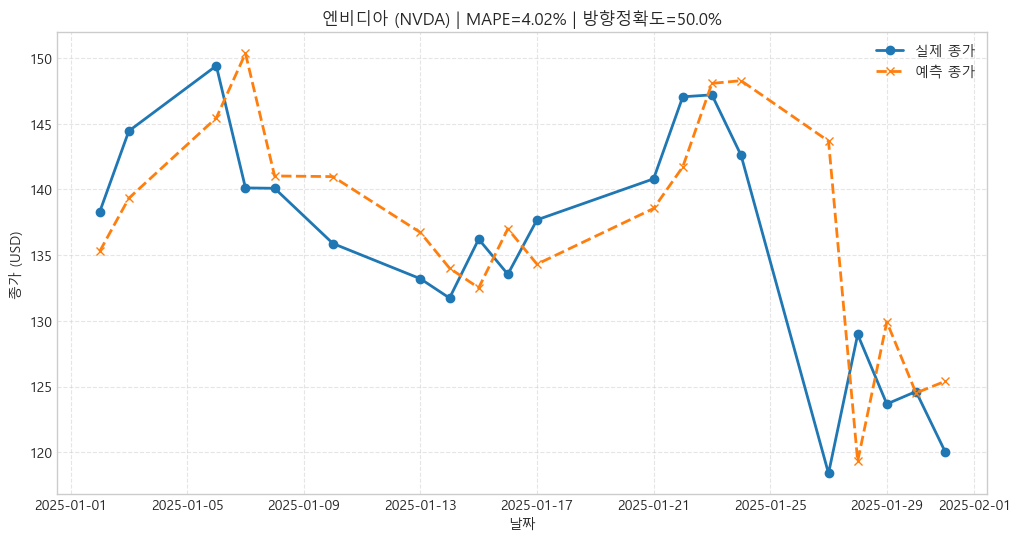

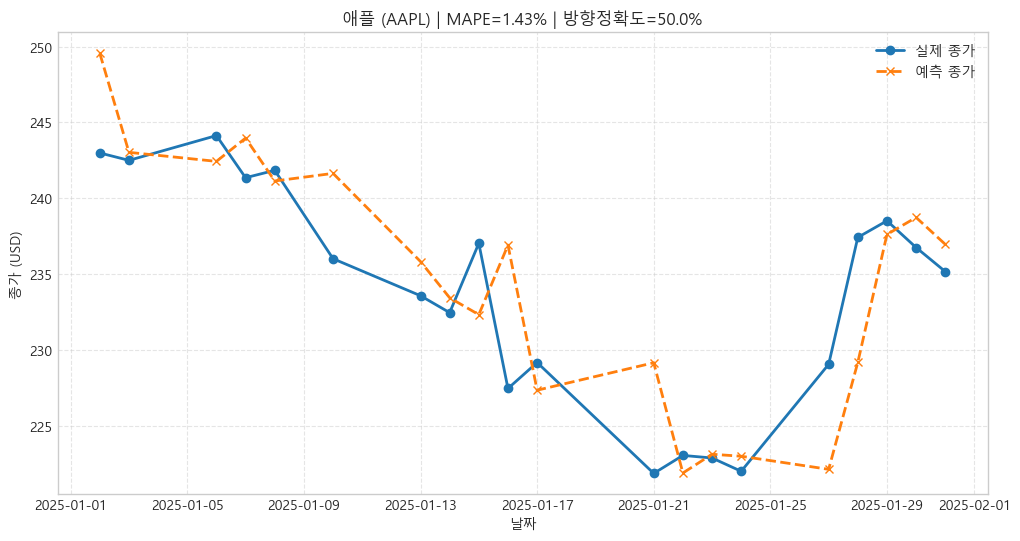

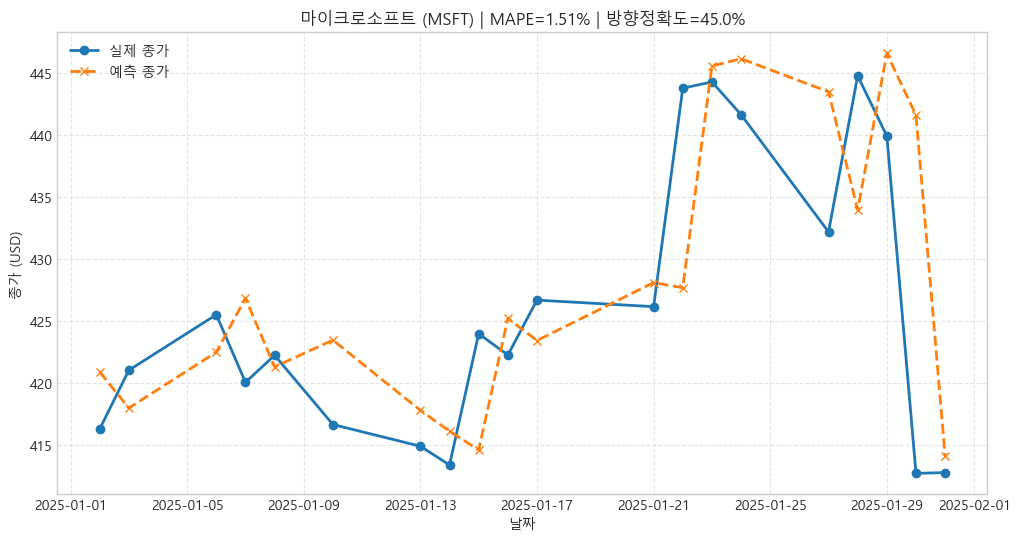

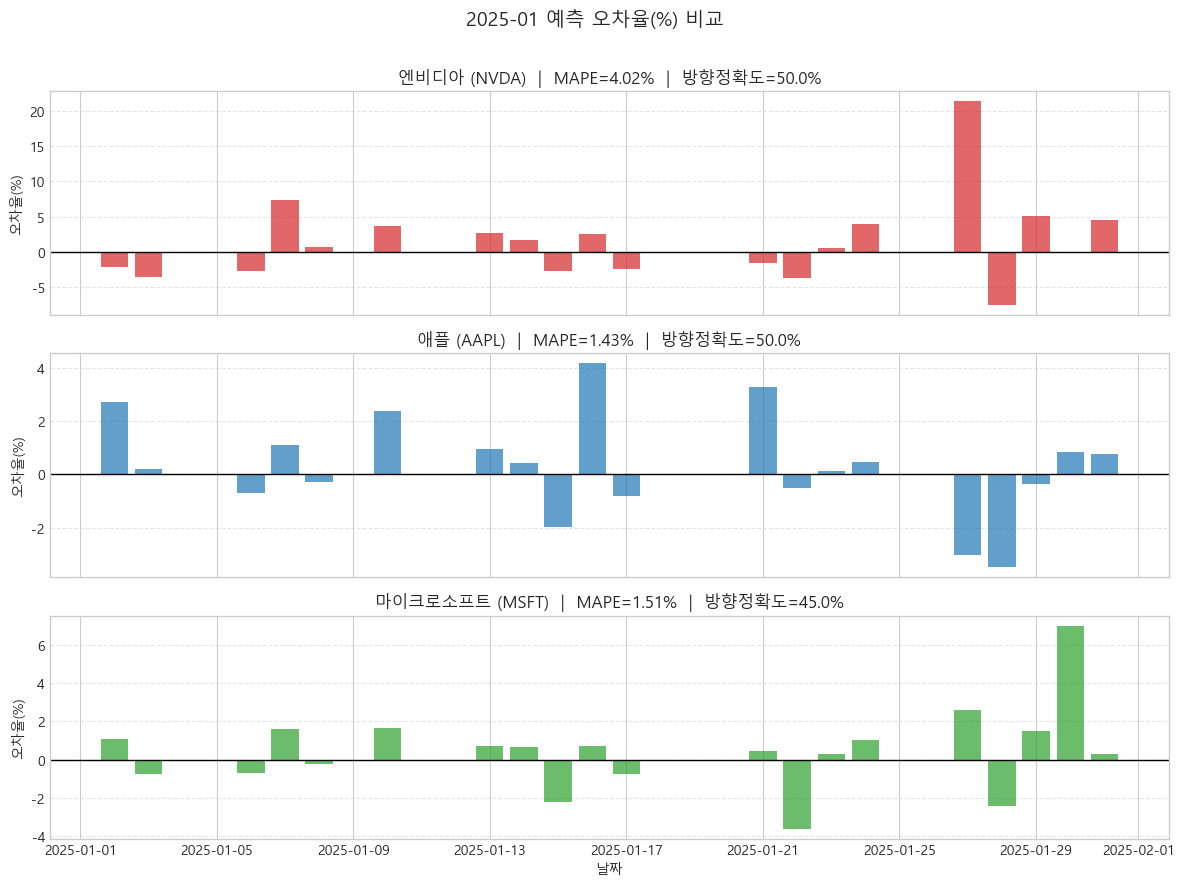

In [ ]:
# =========================================
# 1. 라이브러리 및 설정
# =========================================
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  
 
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False

# =========================================
# 2. 파일 경로 및 로드
# =========================================
tickers = {
    "엔비디아 (NVDA)": "C:\\Users\\ska69\\capstone_project\\model_artifacts\\jan2025_NVDA.csv",
    "애플 (AAPL)": "C:\\Users\\ska69\\capstone_project\\model_artifacts\\jan2025_AAPL.csv",
    "마이크로소프트 (MSFT)": "C:\\Users\\ska69\\capstone_project\\model_artifacts\\jan2025_MSFT.csv"
}

dfs = {}
for name, path in tickers.items():
    df = pd.read_csv(path)
    df["예측대상일"] = pd.to_datetime(df["예측대상일"])
    dfs[name] = df

# =========================================
# 3. 종목별 실제 vs 예측 종가 비교 시각화
# =========================================
for name, df in dfs.items():
    plt.figure(figsize=(12,6))
    plt.plot(df["예측대상일"], df["실제종가"], label= "실제 종가", marker='o', linewidth=2)
    plt.plot(df["예측대상일"], df["예측종가"], label= "예측 종가", marker='x', linestyle='--', linewidth=2)

    dir_acc = df["방향일치"].mean() * 100
    mape = df["오차율(%)"].abs().mean()

    plt.title(f"{name} | MAPE={mape:.2f}% | 방향정확도={dir_acc:.1f}%")
    plt.xlabel("날짜")
    plt.ylabel("종가 (USD)")

    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2)) # 2일 간격
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d")) # 일만 표시
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

# =========================================
# 4. 종목별 오차율(%) 비교 시각화
# =========================================
fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)
colors = ["tab:red", "tab:blue", "tab:green"]

for ax, (name, df), c in zip(axes, dfs.items(), colors):
    ax.bar(df["예측대상일"], df["오차율(%)"], color=c, alpha=0.7)
    ax.axhline(0, color="black", linewidth=1)
    mape = df["오차율(%)"].abs().mean()
    dir_acc = df["방향일치"].mean() * 100
    ax.set_title(f"{name}  |  MAPE={mape:.2f}%  |  방향정확도={dir_acc:.1f}%")
    ax.set_ylabel("오차율(%)")
    ax.grid(axis="y", linestyle="--", alpha=0.5)

axes[-1].set_xlabel("날짜")
plt.suptitle("2025-01 예측 오차율(%) 비교", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [ ]:
# ===== 시각화 =====
for t in TICKERS:
    df = pd.read_csv(f"/content/pred_{t}_2025-01_lstm.csv", parse_dates=["date"]).set_index("date")
    plt.figure(figsize=(10,5))
    plt.plot(df.index, df["y_true"], label="Actual", marker="o")
    plt.plot(df.index, df["y_pred"], label="Predicted", marker="x")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d"))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
    hit_rate = df["dir_hit"].mean() if "dir_hit" in df.columns else np.nan
    plt.title(f"{t} Prediction vs Actual (2025-01) | DirAcc={hit_rate:.2%}")
    plt.xlabel("Day"); plt.ylabel("Price (USD)")
    plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()


C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:45: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:45: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:45: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:45: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:45: UserWarning: Glyph 50644 (\N{HANGUL SYLLABLE EN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:45: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) Arial.
  plt.tight_layout()


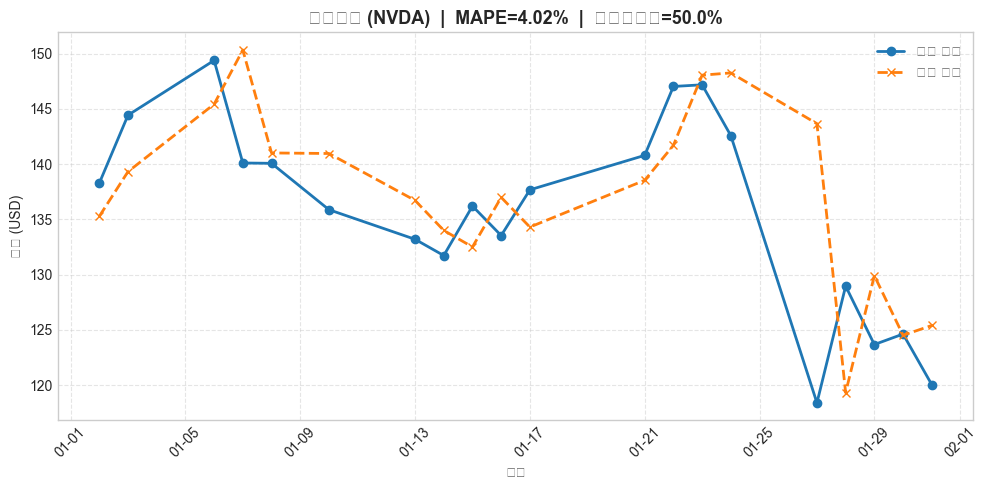

C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:45: UserWarning: Glyph 50528 (\N{HANGUL SYLLABLE AE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:45: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ska69\capstone_project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50528 (\N{HANGUL SYLLABLE AE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ska69\capstone_project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


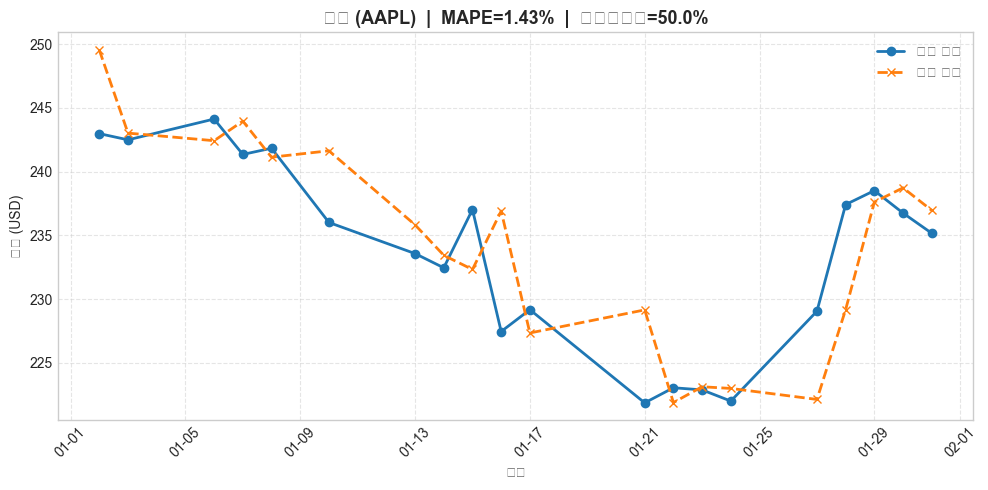

C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:45: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:45: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:45: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:45: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:45: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:45: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) Arial.
  plt.tight_layout()
C:\

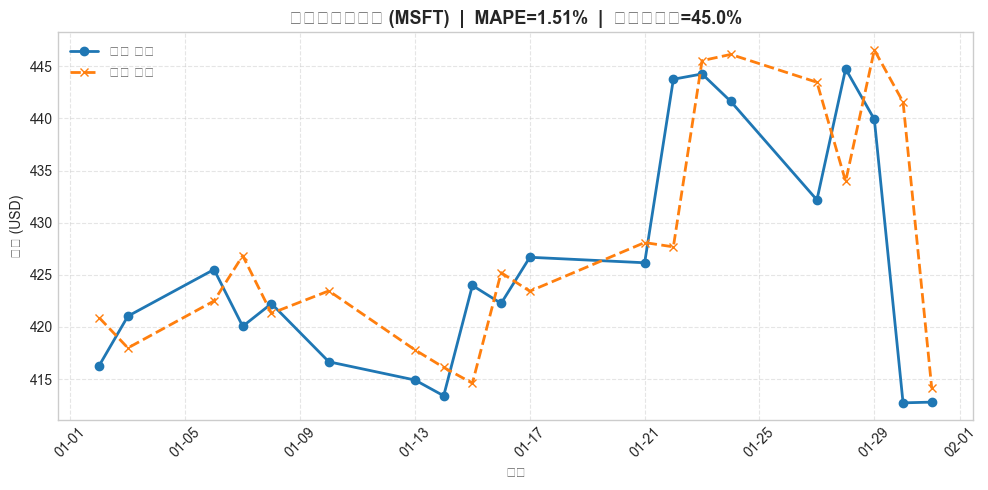

C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:63: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:63: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:63: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:63: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:63: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ska69\AppData\Local\Temp\ipykernel_16900\629646636.py:63: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) Arial.
  plt.tight_layout(

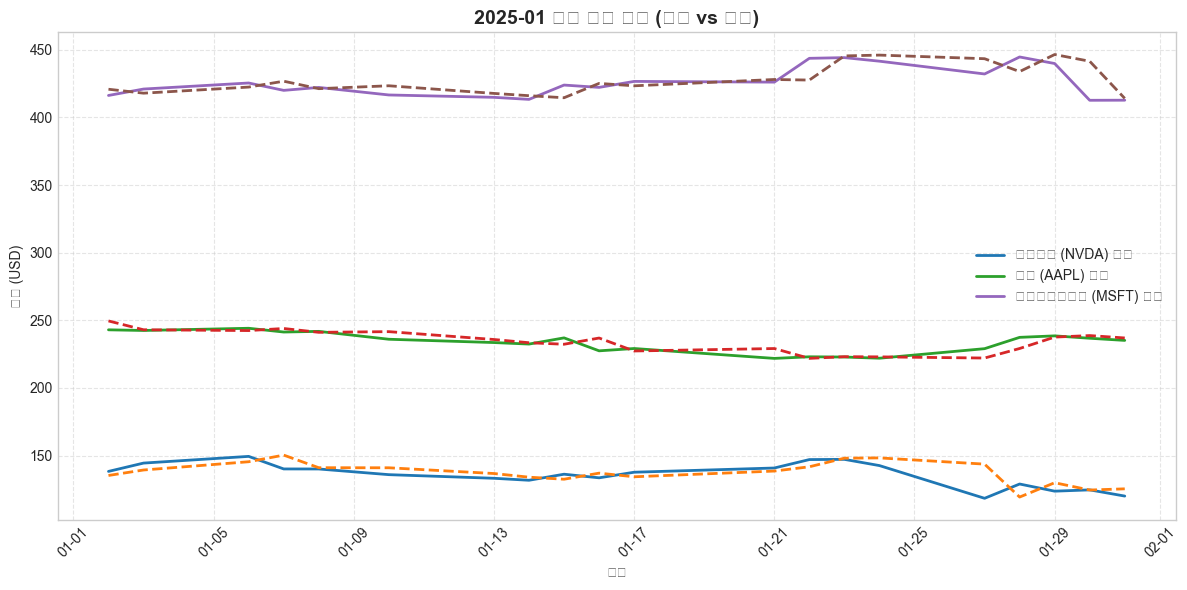

In [9]:
# =========================================
# 1. 라이브러리 및 설정
# =========================================
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("seaborn-v0_8-whitegrid")

# =========================================
# 2. 파일 경로 및 로드
# =========================================
tickers = {
    "엔비디아 (NVDA)": r"C:\Users\ska69\capstone_project\model_artifacts\jan2025_NVDA.csv",
    "애플 (AAPL)": r"C:\Users\ska69\capstone_project\model_artifacts\jan2025_AAPL.csv",
    "마이크로소프트 (MSFT)": r"C:\Users\ska69\capstone_project\model_artifacts\jan2025_MSFT.csv"
}

dfs = {}
for name, path in tickers.items():
    df = pd.read_csv(path)
    df["예측대상일"] = pd.to_datetime(df["예측대상일"])
    dfs[name] = df

# =========================================
# 3. 종목별 실제 vs 예측 종가 비교 그래프
# =========================================
for name, df in dfs.items():
    plt.figure(figsize=(10,5))
    plt.plot(df["예측대상일"], df["실제종가"], label="실제 종가", marker="o", linewidth=2)
    plt.plot(df["예측대상일"], df["예측종가"], label="예측 종가", marker="x", linestyle="--", linewidth=2)
    
    dir_acc = df["방향일치"].mean() * 100
    mape = df["오차율(%)"].abs().mean()
    
    plt.title(f"{name}  |  MAPE={mape:.2f}%  |  방향정확도={dir_acc:.1f}%", fontsize=13, weight="bold")
    plt.xlabel("날짜")
    plt.ylabel("종가 (USD)")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# =========================================
# 4. 3개 종목 전체 종가 비교 (실제 vs 예측)
# =========================================
plt.figure(figsize=(12,6))
for name, df in dfs.items():
    plt.plot(df["예측대상일"], df["실제종가"], label=f"{name} 실제", linewidth=2)
    plt.plot(df["예측대상일"], df["예측종가"], linestyle="--", linewidth=2)

plt.title("2025-01 종가 예측 비교 (실제 vs 예측)", fontsize=14, weight="bold")
plt.xlabel("날짜")
plt.ylabel("종가 (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
